In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('drive/MyDrive/house_price/train.csv')


In [4]:
pd.set_option('display.max_columns', None)
df = pd.DataFrame(data)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# display(df[(df.SalePrice) & (df.Alley.notna())])

In [6]:
# filling missing values
df.LotFrontage.fillna(df.LotFrontage.median(), inplace = True)
df.Electrical.fillna('SBrkr', inplace = True)

In [7]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [8]:
df.replace(np.nan, 'na', inplace = True)

In [9]:
df.sort_values(by = ['YrSold', 'MoSold'], inplace = True, ascending = True)

In [ ]:
# All the columns with string datatypes
for col_names, contents in df.items():
  if pd.api.types.is_string_dtype(contents):
    print(col_names)


In [11]:
# String columns into categorical values
for col_names, contents in df.items():
  if not pd.api.types.is_numeric_dtype(contents):
    df[col_names] = pd.Categorical(contents).codes+1

In [12]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

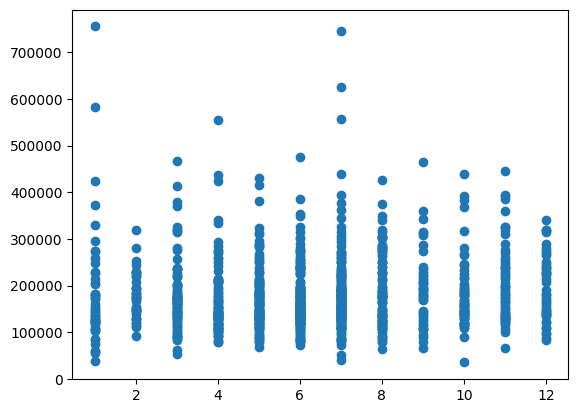

In [13]:
fig, ax = plt.subplots()
ax.scatter( df["MoSold"][:1000], df["SalePrice"][:1000])

In [14]:
df.SalePrice = np.log(df.SalePrice)

In [15]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values
print(X)
print(y)

[[ 142.   20.    4. ... 2006.    9.    5.]
 [ 170.   20.    4. ... 2006.    9.    5.]
 [ 303.   20.    4. ... 2006.    9.    5.]
 ...
 [1145.  190.    4. ... 2010.    9.    5.]
 [1161.  160.    4. ... 2010.    9.    5.]
 [1422.  120.    4. ... 2010.    9.    5.]]
[[12.46843691]
 [12.33710091]
 [12.23076526]
 ...
 [11.28978191]
 [11.8913619 ]
 [11.75587164]]


In [16]:
X.shape, y.shape

((1460, 80), (1460, 1))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size = 0.2,
                                                  random_state = 42)

<Axes: >

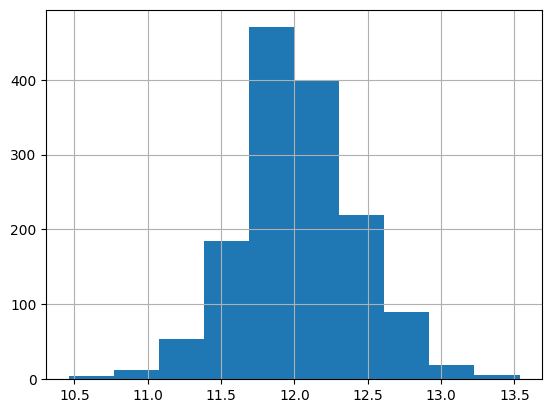

In [18]:
df.SalePrice.hist()

In [19]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import linear_model

In [20]:
models = {'linear_regression' : LinearRegression(),
          'rf_reg' : RandomForestRegressor(),
          'ridge' : Ridge(),
          'Gradient_boosting' : GradientBoostingRegressor()}

model_scores = {};

def fit_and_score(models, X_train, y_train, X_val, y_val):

  np.random.seed(42)


  for name, model in models.items():
    model.fit(X_train, y_train.ravel())
    model_scores[name] = model.score(X_val, y_val)
  return model_scores;

In [21]:
fit_and_score(models, X_train, y_train, X_val, y_val)
model_scores

{'linear_regression': 0.8487560517869766,
 'rf_reg': 0.8553412989363907,
 'ridge': 0.8493820334311897,
 'Gradient_boosting': 0.8860979739564301}

<Axes: >

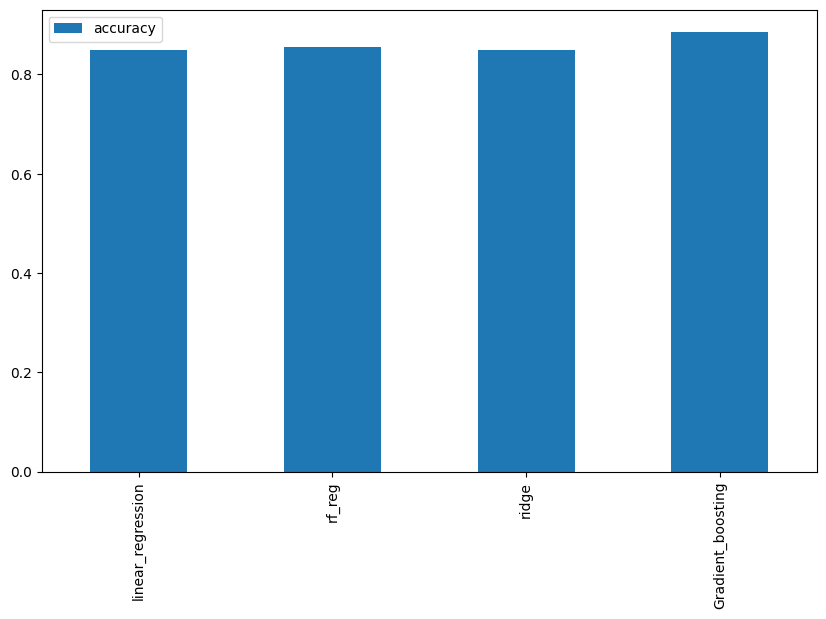

In [22]:
pd.DataFrame(model_scores, index = ['accuracy']).T.plot.bar(figsize = (10,6))

In [23]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, mean_squared_error

def rmsle(actual, predictions):
  return np.sqrt(mean_squared_log_error(actual, predictions))

def show_scores(model):
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "val MAE": mean_absolute_error(y_val, val_preds),
            "Train RMSLE": rmsle(y_train, train_preds),
            "val RMSLE": rmsle(y_val, val_preds),
            "Training R2": r2_score(y_train, train_preds),
            "valid R2": r2_score(y_val, val_preds),
            "Training RMSE": mean_squared_error(y_train, train_preds, squared = False),
            "Val RMSE": mean_squared_error(y_val, val_preds, squared = False),
            }
  return scores

In [24]:
%%time

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

GBR_grid = {"max_features" : [0.1, 1, "sqrt"],
          "max_depth" : [10, 50, 100],
          "min_samples_leaf" : [2, 10, 50, 100],
          "n_estimators" : np.arange(10, 100, 10),
          "learning_rate" : [0.1, 0.3, 0.6, 0.9]
          }

GS_GBS_model = GridSearchCV(GradientBoostingRegressor(
                                                 random_state = 42),
                           param_grid = GBR_grid,
                           cv = 5,
                           verbose = True,
                            scoring = "neg_mean_squared_error"
                            )

GS_GBS_model.fit(X_train, y_train.ravel())


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
CPU times: user 10min 35s, sys: 1e+03 ms, total: 10min 36s
Wall time: 11min


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.1, 0.3, 0.6, 0.9],
                         'max_depth': [10, 50, 100],
                         'max_features': [0.1, 1, 'sqrt'],
                         'min_samples_leaf': [2, 10, 50, 100],
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='neg_mean_squared_error', verbose=True)

In [79]:
show_scores(GS_GBS_model)

{'Training MAE': 0.06370997219339582,
 'val MAE': 0.08475260855473327,
 'Train RMSLE': 0.007399027451767479,
 'val RMSLE': 0.010592065732356565,
 'Training R2': 0.943040190428526,
 'valid R2': 0.8830793103888118,
 'Training RMSE': 0.09529808323192783,
 'Val RMSE': 0.13655884110450045}

In [75]:
from sklearn.model_selection import cross_validate
cv_score = cross_validate(GradientBoostingRegressor(), X_train, y_train.ravel(), cv=5, scoring=('r2', 'neg_mean_squared_error'))
sorted(cv_score.keys())

print(cv_score['test_neg_mean_squared_error'])

[-0.01658971 -0.01814557 -0.01503595 -0.02075484 -0.02157986]


In [94]:

show_scores(GBS_model.fit(X_train, y_train))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Training MAE': 0.062472177044582515,
 'val MAE': 0.08616596674627008,
 'Train RMSLE': 0.007367130674184265,
 'val RMSLE': 0.010621966657697737,
 'Training R2': 0.9435978612959456,
 'valid R2': 0.8818262899712187,
 'Training RMSE': 0.0948304229100689,
 'Val RMSE': 0.13728863073578765}

In [73]:
GBS_model = GradientBoostingRegressor(
    learning_rate = 0.1,
    max_depth = 10,
    max_features = 0.1,
    min_samples_leaf = 50,
    n_estimators = 90
)

In [71]:
GS_GBS_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'max_features': 0.1,
 'min_samples_leaf': 50,
 'n_estimators': 90}

In [ ]:
df.LotFrontage.fillna(df.LotFrontage.median(), inplace = True)
df.replace(np.nan, 'na', inplace = True)
df.sort_values(by = ['YrSold', 'MoSold'], inplace = True, ascending = True)
for col_names, contents in df.items():
  if not pd.api.types.is_numeric_dtype(contents):
    df[col_names] = pd.Categorical(contents).codes+1
df.SalePrice = np.log(df.SalePrice)

In [99]:
def preprocess(data):
  data.LotFrontage.fillna(data.LotFrontage.median(), inplace = True)
  data.replace(np.nan, 'na', inplace = True)
  data.sort_values(by = ['YrSold', 'MoSold'], inplace = True, ascending = True)
  for col_names, contents in data.items():
    if not pd.api.types.is_numeric_dtype(contents):
      data[col_names] = pd.Categorical(contents).codes+1




In [104]:
test_df = pd.read_csv('drive/MyDrive/house_price/test.csv')
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [106]:
preprocess(test_df)

In [107]:
test_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [111]:
GBS_model.fit(X, y.ravel())

GradientBoostingRegressor(max_depth=10, max_features=0.1, min_samples_leaf=50,
                          n_estimators=90)

In [113]:
cv_score = cross_validate(GradientBoostingRegressor(), X, y.ravel(), cv=5, scoring=('r2', 'neg_mean_squared_error'))
sorted(cv_score.keys())

print(cv_score['test_neg_mean_squared_error'])

[-0.01391701 -0.01817894 -0.02616499 -0.01716095 -0.0193106 ]


In [112]:
show_scores(GBS_model)

{'Training MAE': 0.061372761822820095,
 'val MAE': 0.0598856885677284,
 'Train RMSLE': 0.007201926738155756,
 'val RMSLE': 0.007872569825352565,
 'Training R2': 0.9463171832021899,
 'valid R2': 0.9353517155754234,
 'Training RMSE': 0.09251614946579678,
 'Val RMSE': 0.10154361972724814}

In [117]:
test_predictions = GBS_model.predict(test_df.values)

In [154]:
final_predictions = np.expm1(test_predictions)

In [122]:
final_predictions

array([213238.49962242, 338893.61900739, 216827.26665536, ...,
       113181.87917732, 133194.43595997, 203214.54383382])

In [124]:
GBS_model.feature_importances_

array([2.44950894e-03, 1.65666458e-03, 1.59065719e-03, 6.80046011e-03,
       2.04298175e-02, 0.00000000e+00, 0.00000000e+00, 1.16265932e-03,
       2.16258466e-04, 0.00000000e+00, 1.57749722e-04, 1.27709356e-04,
       9.94747075e-03, 1.25135549e-03, 0.00000000e+00, 2.45733039e-04,
       1.30990582e-03, 7.45123868e-02, 1.67347180e-02, 1.96197024e-02,
       4.94766490e-02, 1.22091142e-03, 0.00000000e+00, 7.14965445e-04,
       6.96088179e-04, 1.54068780e-04, 1.75900547e-03, 9.06160221e-02,
       2.73103203e-04, 5.81705061e-04, 4.32246750e-02, 2.63212959e-05,
       2.81449711e-03, 2.64037338e-03, 2.79773240e-02, 1.23568396e-05,
       2.75864076e-05, 2.05163316e-03, 8.27778953e-02, 0.00000000e+00,
       2.99984594e-02, 1.55257641e-02, 1.53168279e-03, 6.98934849e-02,
       3.18415140e-02, 0.00000000e+00, 8.65348173e-02, 2.20690140e-03,
       0.00000000e+00, 3.40596225e-02, 1.85387596e-03, 1.18342719e-03,
       1.98363673e-04, 3.63200219e-02, 1.54273824e-02, 2.24008510e-03,
      

In [125]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

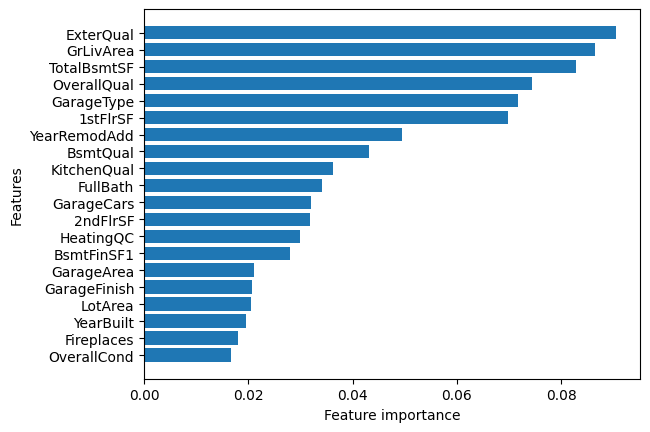

In [128]:
plot_features(test_df.columns, GBS_model.feature_importances_)

In [155]:
final_predictions

array([213238.49962242, 338893.61900739, 216827.26665536, ...,
       113181.87917732, 133194.43595997, 203214.54383382])

In [133]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1162,2623,60,4,50.0,13128,2,3,1,2,1,2,1,9,3,3,1,5,8,5,2005,2005,2,1,11,13,2,134,3,5,3,3,4,4,6,1,6,1,622,331,1,1,2,4,1074,990,0,2064,1,1,2,1,4,1,3,7,7,1,3,2,91,1,3,215,4,5,3,0,119,0,0,0,0,3,5,4,0,1,2006,9,5
1171,2632,60,4,92.0,15922,2,3,1,2,1,1,1,23,3,3,1,5,9,5,2005,2006,4,1,11,13,2,266,3,5,3,1,4,1,6,1,6,1,708,514,1,1,2,4,1390,1405,0,2795,1,1,3,1,4,1,1,10,7,1,3,4,91,1,4,311,4,5,3,272,102,0,0,0,0,3,5,4,0,1,2006,7,6
1225,2686,60,4,75.0,12447,2,3,1,4,1,5,1,22,7,3,1,5,8,5,2005,2006,2,1,6,6,4,117,3,5,3,3,2,4,6,1,6,1,635,350,1,1,2,4,1116,848,0,1964,1,1,2,1,3,1,3,8,7,1,3,4,91,1,3,362,4,5,3,200,70,0,0,0,0,3,5,4,0,1,2006,7,6
1231,2692,20,4,74.0,7733,2,3,1,4,1,5,1,21,3,3,1,3,6,5,2005,2005,2,1,11,13,3,1,4,5,3,4,4,3,3,4,6,1,641,374,1,1,2,4,1142,0,0,1142,1,1,1,1,3,1,3,5,7,0,6,7,98,4,1,1,5,6,3,4,50,0,0,0,0,3,5,4,0,1,2006,9,5
1247,2708,20,4,67.0,13052,2,3,1,4,1,2,1,20,3,3,1,3,5,6,1965,1965,2,1,7,7,3,1,4,5,2,4,4,4,5,374,6,1,204,288,1,5,2,4,1024,0,0,1024,1,1,1,1,3,1,4,5,7,0,6,2,51,3,2,65,4,5,3,0,0,0,0,0,0,3,3,4,0,1,2006,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1616,160,5,21.0,1900,2,3,4,4,1,5,1,11,3,3,5,5,4,4,1970,1970,2,1,6,6,3,1,4,5,2,4,4,4,6,1,6,1,372,53,1,1,2,4,546,546,0,1092,1,1,1,1,3,1,4,5,7,0,6,7,98,4,1,1,5,6,3,0,0,0,0,0,0,3,5,4,0,6,2010,9,5
156,1617,160,5,21.0,1890,2,3,4,4,1,5,1,11,3,3,5,5,4,6,1972,1972,2,1,6,6,3,1,4,5,2,4,4,4,5,125,6,1,160,53,1,5,2,4,546,546,0,1092,1,1,1,1,3,1,4,5,7,0,6,2,58,3,2,50,4,5,3,0,0,64,0,0,0,3,5,4,0,6,2010,9,5
157,1618,20,4,50.0,6953,2,3,4,4,1,5,1,12,3,3,1,3,5,7,1971,2004,2,1,11,13,3,1,4,3,2,4,4,4,1,229,6,1,266,194,1,1,2,4,874,0,0,874,1,1,1,0,3,1,4,5,7,0,6,6,57,3,2,92,4,5,3,0,0,0,0,0,0,3,5,4,0,6,2010,4,5
118,1579,85,4,82.0,11105,2,3,4,4,1,1,1,6,3,3,1,6,5,5,1996,1996,2,1,11,13,3,1,4,3,3,3,1,1,3,456,6,1,1,197,1,3,2,4,965,0,0,965,2,1,1,0,2,1,4,4,7,0,6,2,84,3,3,258,2,5,3,71,0,0,0,0,0,3,1,4,0,7,2010,9,5


In [138]:
submission_file = pd.DataFrame()

In [158]:
floatlist = []
for item in final_predictions:
    floatlist.append("{0:.5f}".format(item))

In [ ]:
list(floatlist)

In [166]:
submission_file["Id"] = test_df.Id
submission_file["SalePrice"] = list(floatlist)

In [167]:
submission_file

,Id,SalePrice
1162,2623,213238.49962
1171,2632,338893.61901
1225,2686,216827.26666
1231,2692,117500.03743
1247,2708,113094.57880
...,...,...
155,1616,78485.43102
156,1617,91949.72009
157,1618,113181.87918
118,1579,133194.43596


In [169]:
submission_file.to_csv("drive/MyDrive/house_price/house_price_predictions_submission.csv",
                index = False)